In [1]:
import numpy as np

In [35]:
moc_header = [
    ("label", "S4"),
    ("version", "S4"),
    ("file_bytes", "i4"),
    ("mosaic_id", "i2"),
    ("coordinate", "i2"),
    ("varname", "S8"),
    ("description", "S64"),
    ("block_pos", "i4"),
    ("block_len", "i4"),
    ("time_zone", "i4"),
    ("yr", "i2"),
    ("mon", "i2"),
    ("day", "i2"),
    ("hr", "i2"),
    ("min", "i2"),
    ("sec", "i2"),
    ("obs_seconds", "i4"),
    ("obs_dates", "u2"),
    ("gen_dates", "u2"),
    ("gen_seconds", "i4"),
    ("edge_s", "i4"),
    ("edge_w", "i4"),
    ("edge_n", "i4"),
    ("edge_e", "i4"),
    ("cx", "i4"),
    ("cy", "i4"),
    ("nx", "i4"),
    ("ny", "i4"),
    ("dx", "i4"),
    ("dy", "i4"),
    ("height", "i2"),
    ("compress", "i2"),
    ("num_of_radars", "i4"),
    ("unzip_bytes", "i4"),
    ("scale", "i2"),
    ("unused", "i2"),
    ("rgn_id", "S8"),
    ("units", "S8"),
    ("res1", "60c")
]

In [36]:
moc_header_dtype = np.dtype(moc_header)

In [37]:
f = open('/Users/zhaozh/Meteo/RadarData/RADA_L3_MST_CREF_QC/Z_RADA_C_BABJ_20230517065407_P_DOR_ACHN_CREF_20230517_064800.bin', 'rb')

In [38]:
header = np.frombuffer(f.read(256), moc_header_dtype)

In [44]:
# 1.	label[4]	char	0-3	文件固定标识：MOC
label = header['label']
# 2.	Version[4]	char	4-7	文件格式版本代码，如:,1.0，1.1，etc
version = header['version']
# 3.	FileBytes	int	8-11	包含头信息在内的文件字节数，不超过2M
file_bytes = header['file_bytes']
# 4.	MosaicID	short	12-13	拼图产品编号
mosaic_id = header['mosaic_id']
# 5.	coordinate	short	14-15	坐标类型:,2=笛卡儿坐标,3=等经纬网格坐标
coordinate = header['coordinate']
# 6.	varname[8]	char	16-23	产品代码,如:,ET,VIL,CR,CAP,OHP,OHPC
varname = header['varname']
# 7.	description[64];	char	24-87	产品描述，如Composite,Reflectivity,mosaic
description = header['description']
# 8.	BlockPos	int	88-91	产品数据起始位置(字节顺序)
block_pos = header['block_pos']
# 9.	BlockLen	int	92-95	产品数据字节数
block_len = header['block_len']
# 10.	TimeZone	int	96-99	数据时钟,0=世界时,28800=北京时
time_zone = header['time_zone']
# 11.	yr	short	100-101	观测时间中的年份
dt_yr = header['yr']
# 12. mon	short	102-103	观测时间中的月份（1－12）
dt_mon = header['mon']
# 13.	day	short	104-105	观测时间中的日期（1－31）
dt_day = header['day']
# 14.	hr	short	106-107	观测时间中的小时（00－23）
dt_hr = header['hr']
# 15.	min	short	108-109	观测时间中的分（00－59）
dt_min = header['min']
# 16.	sec	short	110-111	观测时间中的秒（00－59）
sec = header['sec']
# 17.	ObsSeconds	int	112-115	观测时间的seconds
obs_seconds = header['obs_seconds']
# 18.	ObsDates	unsigned short	116-117	观测时间中的Julian,dates
obs_dates = header['obs_dates']
# 19.	GenDates	Unsigned short	118-119	产品处理时间的天数
gen_dates = header['gen_dates']
# 20.	GenSeconds	int	120-123	产品处理时间的描述
gen_seconds = header['gen_seconds']
# 21.	edge_s	int	124-127	数据区的南边界，单位：1/1000度，放大1千倍
edge_s = header['edge_s']
# 22.	edge_w	int	128-131	数据区的西边界，单位：1/1000度，放大1千倍
edge_w = header['edge_w']
# 23.	edge_n	int	132-135	数据区的北边界，单位：1/1000度，放大1千倍
edge_n = header['edge_n']
# 24.	edge_e	int	136-139	数据区的东边界，单位：1/1000度，放大1千倍
edge_e = header['edge_e']
# 25.	cx	int	140-143	数据区中心坐标，单位：1/1000度，放大1千倍
cx = header['cx']
# 26.	cy	int	144-147	数据区中心坐标，单位：1/1000度，放大1千倍
cy = header['cy']
# 27.	nX	int	148-151	格点坐标为列数
nx = header['nx']
# 28.	nY	int	152-155	格点坐标为行数
ny = header['ny']
# 29.	dx	int	156-159	格点坐标为列分辨率，单位：1/10000度，放大1万倍
dx = header['dx']
# 30.	dy	int	160-163	格点坐标为行分辨率，单位：1/10000度，放大1万倍
dy = header['dy']
# 31.	height	short	164-165	雷达高度
height = header['height']
# 32.	Compress	short	166-167	数据压缩标识,,0=无,1=bz2,2=zip,3=lzw,,
compress = header['compress']
# 33.	num_of_radars	int	168-171 	有多少个雷达进行了拼图
num_of_radars = header['num_of_radars']
# 34.	UnZipBytes	int	172-175	数据段压缩前的字节数
unzip_bytes = header['unzip_bytes']
# 35.	scale	short	176-177	数据放大倍数，组合反射率目前是10倍
scale = header['scale']
# 36.	unUsed	short	178-179	文件格式版本代码，如:,1.0，1.1，etc
unused = header['unused']
# 37.	RgnID[8]	char	180-187	包含头信息在内的文件字节数，不超过2M
rgn_id = header['rgn_id']
# 38.	units[8]	char	188-195	拼图产品编号
units = header['units']
# 39.	reserved[60];	char	196-255	坐标类型:,2=笛卡儿坐标,3=等经纬网格坐标
res1 = header['res1']

In [46]:
label

array([b'MOC'], dtype='|S4')

## 文件头
nX，nY，。。 Compress 。。
## 数据块
nx*ny个short数组，根据Compress判断是否压缩，一般为bz压缩

In [45]:
# 格点数
header['nx'] * header['ny']

array([26040000], dtype=int32)

In [46]:
# 数据块为nX*nY（文件头中定义变量）个short类型数组，根据文件头中的Compress标志位判断是否压缩，数据按逐行顺序存储。
header['nx'] * header['ny'] * 2

array([52080000], dtype=int32)

In [47]:
# 数据块
# 数据压缩标识
compress = header['compress']
# 数据块长度
block_len = header['block_len']

In [48]:
# 读取数据块
f.seek(256)
block_data = f.read(int(block_len))

In [49]:
# 数据
len(block_data)

1651444

In [50]:
import bz2
# 根据
if compress == 1:
    new_block_data = bz2.decompress(block_data)
else:
    new_block_data = block_data

In [51]:
len(new_block_data)

52080000

In [7]:
np.frombuffer(b'\x01\x02\x03\x04\x05\x06', dtype=np.int16)

array([ 513, 1027, 1541], dtype=int16)

In [52]:
scale = int(header['scale'])
nx = int(header['nx'])
ny = int(header['ny'])

In [53]:
new_block_data[1]

128

In [54]:
result_list = []
for i in range(0, len(new_block_data), 2):
    value = np.frombuffer(new_block_data[i:i+2], dtype=np.int16)
    result_list.append(value)

len(result_list)

26040000

In [55]:
result_list[0]

array([-32768], dtype=int16)

In [56]:
raw = np.array(result_list).reshape(ny, nx) / scale
# raw = np.where(raw==12.8, None, raw)

In [57]:
# import numpy.ma as ma
# raw = ma.masked_values(raw, -3276.8)

In [58]:
raw

array([[-3276.8, -3276.8, -3276.8, ..., -3276.8, -3276.8, -3276.8],
       [-3276.8, -3276.8, -3276.8, ..., -3276.8, -3276.8, -3276.8],
       [-3276.8, -3276.8, -3276.8, ..., -3276.8, -3276.8, -3276.8],
       ...,
       [-3276.8, -3276.8, -3276.8, ..., -3276.8, -3276.8, -3276.8],
       [-3276.8, -3276.8, -3276.8, ..., -3276.8, -3276.8, -3276.8],
       [-3276.8, -3276.8, -3276.8, ..., -3276.8, -3276.8, -3276.8]])

In [59]:
edge_e = float(header['edge_e'] / 1000)
edge_w = float(header['edge_w'] / 1000)
edge_n = float(header['edge_n'] / 1000)
edge_s = float(header['edge_s'] / 1000)
nx = int(header['nx'])
ny = int(header['ny'])
dx = header['dx'] / 10000
dy = header['dy'] / 10000

In [60]:
ny

4200

In [61]:
lon = np.linspace(edge_w, edge_e, nx + 1)

In [62]:
lon

array([ 73.  ,  73.01,  73.02, ..., 134.98, 134.99, 135.  ])

In [63]:
nx

6200

In [64]:
lat = np.linspace(edge_n, edge_s, ny + 1)

In [65]:
lat

array([54.2 , 54.19, 54.18, ..., 12.22, 12.21, 12.2 ])

from xarray import Dataset, DataArray
da = DataArray(raw, coords=[lat, lon], dims=['latitude', 'longitude'])
ds = Dataset(
    attrs={
        'elevation': '1231321'
    },
)
ds['cref'] = (['latitude', 'longitude'], raw)
ds

In [67]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as cmx
from cinrad.common import get_dtype
from cinrad.visualize.utils import cmap_plot, norm_plot, prodname, save, plot_kw
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [78]:
#中国行政区域数据来源GMT中文社区：https://docs.gmt-china.org/latest/dataset-CN/CN-border/
# 读取坐标数据
# with open(r'/Users/zhaozh/GIS/china-geospatial-data/CN-border-La.gmt') as src:
#     context = src.read()
#     blocks = [cnt for cnt in context.split('>') if len(cnt) > 0]
#     borders = [np.fromstring(block, dtype=float, sep=' ') for block in blocks]

In [69]:
lon1 = np.linspace(73, 135, 6201)

In [70]:
lat1 = np.linspace(54.2, 12.2, 4201)

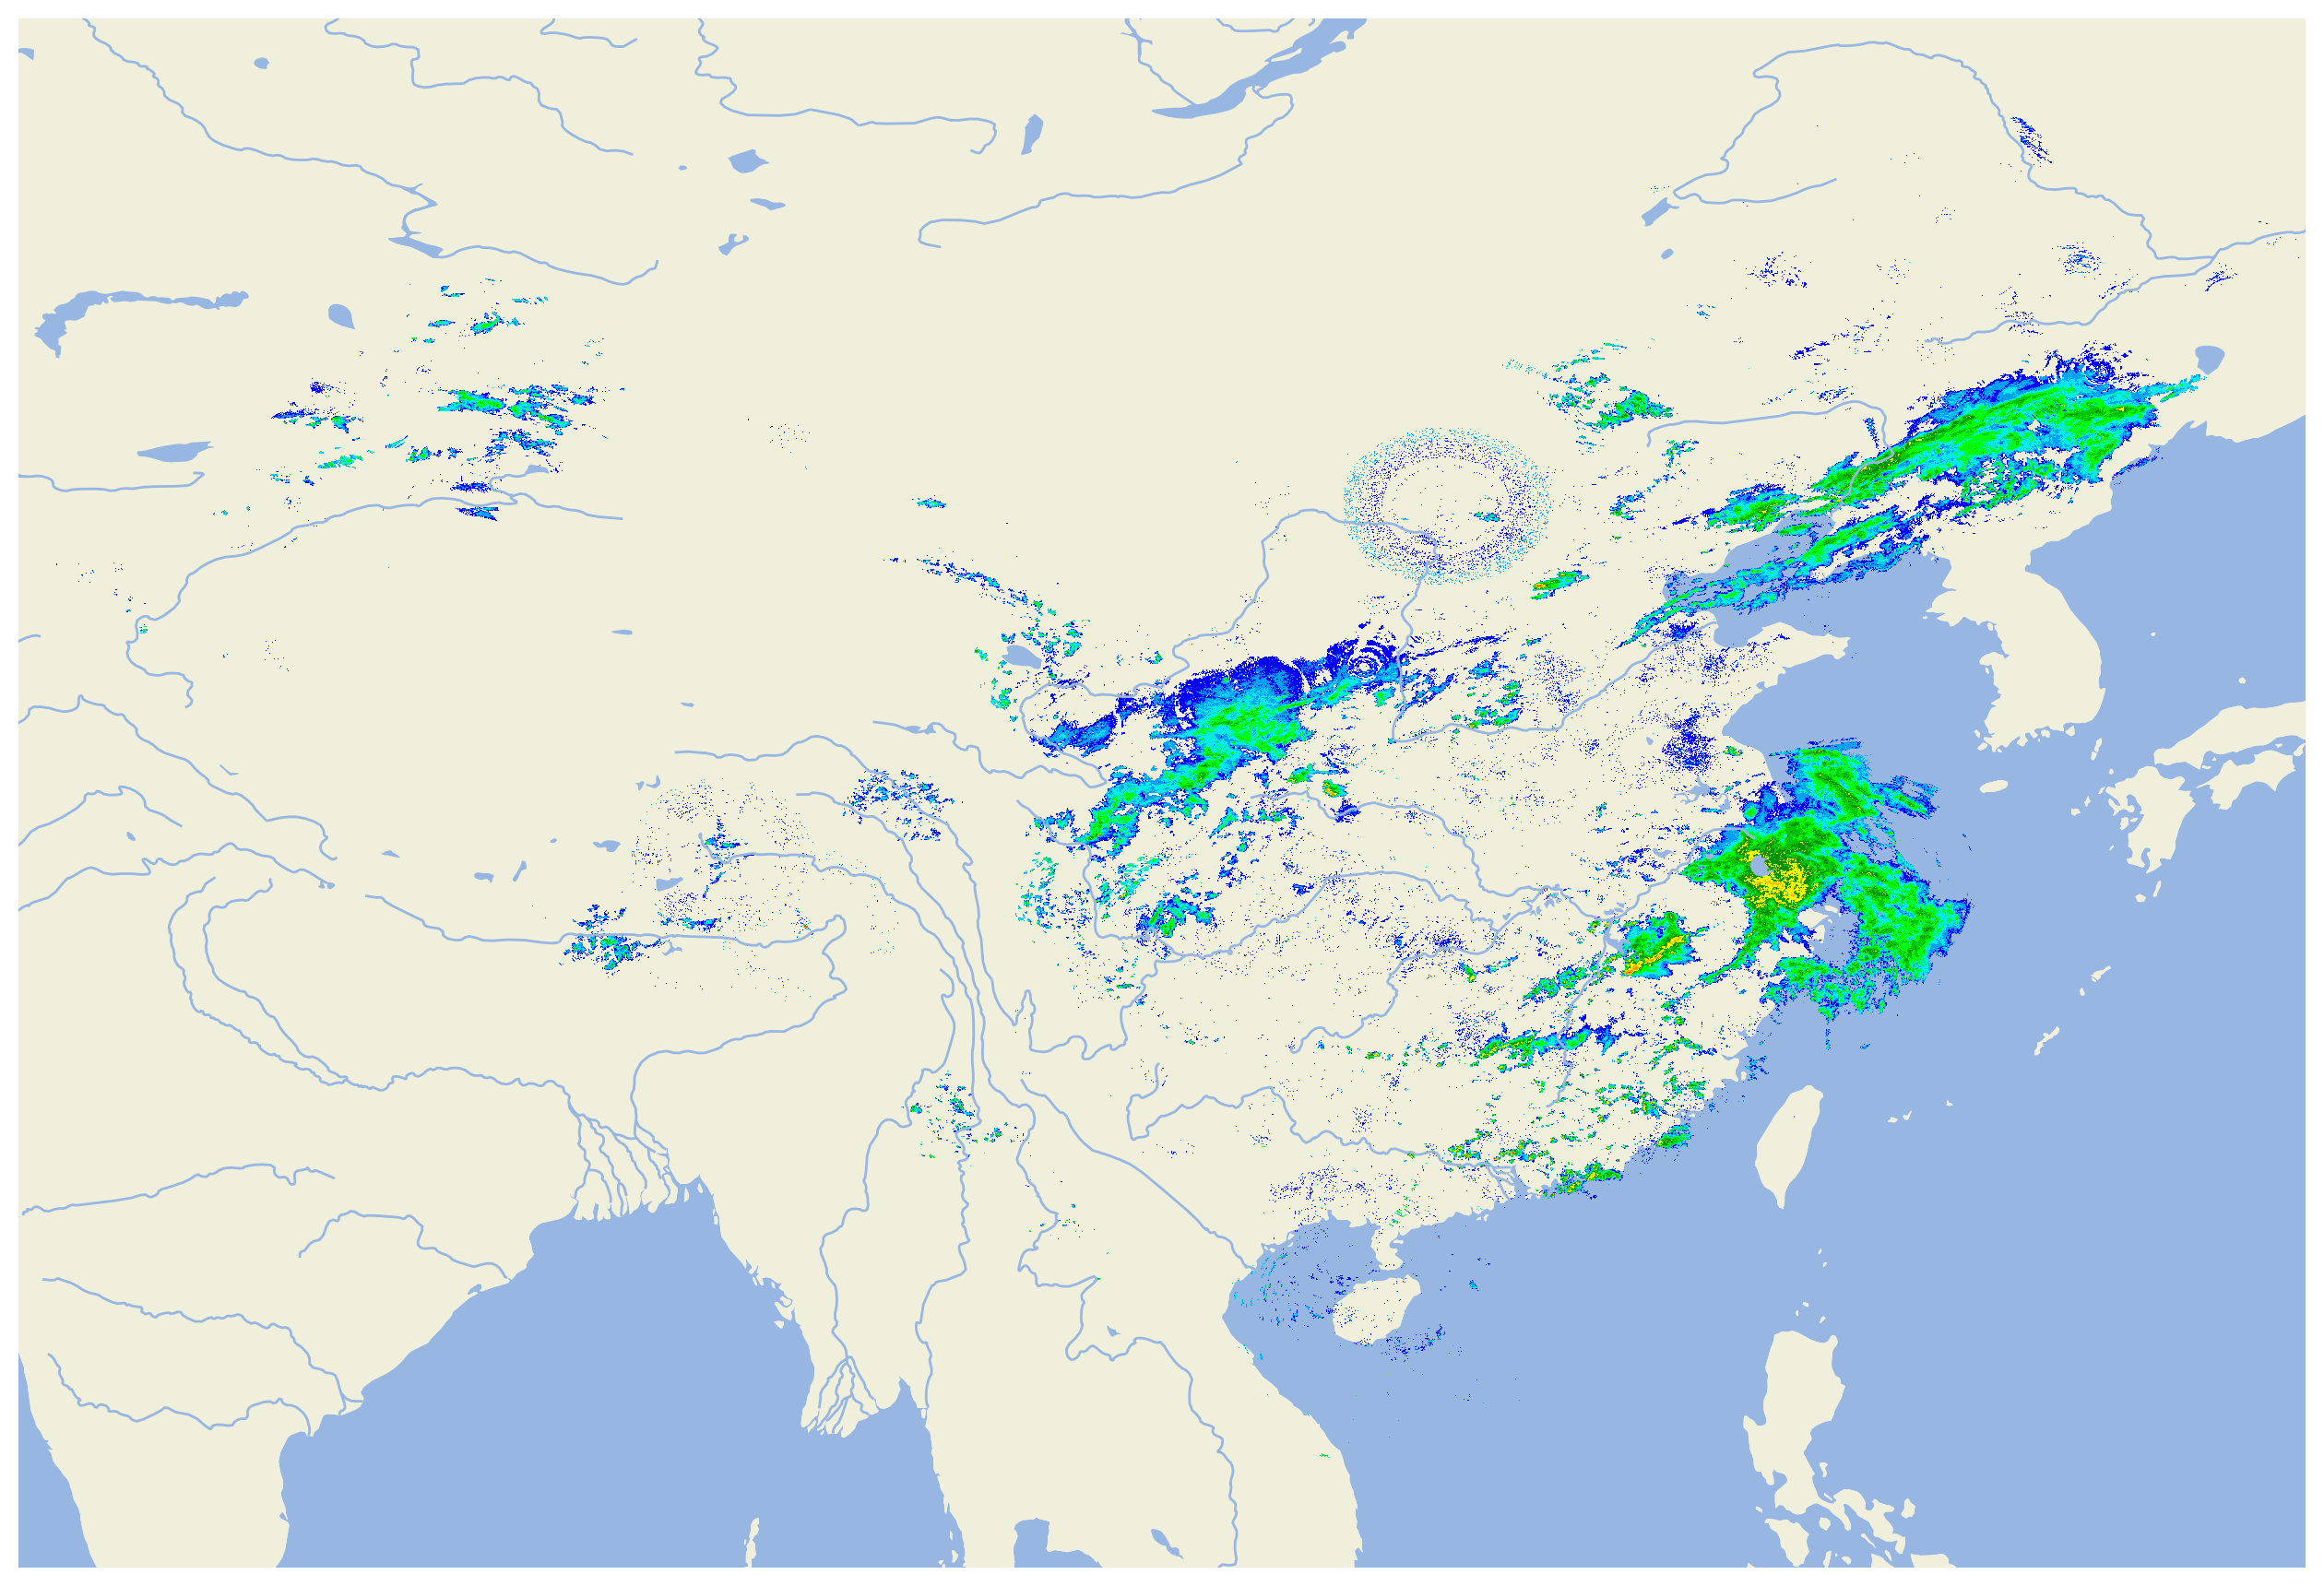

In [76]:
cmap = cmap_plot['REF']
norm = cmx.Normalize(5, 70) #norm_plot['REF']
proj = ccrs.PlateCarree()
## 绘制图形
fig = plt.figure(figsize=(12.4, 8.4),dpi=200)             #画布第一
ax = fig.add_axes([0,0,1,1], projection = proj)          #绘图区声明
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())
# ax.set_extent([80, 130, 13, 55])
# 布满画布
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
# 隐藏画布边框子图坐标
plt.axis('off')

# ax.imshow(raw, cmap=cmap, vmin=np.min(raw[raw != -3276.8]), vmax=np.max(raw))

# 缺测值
fill_value = 5
mask = np.less(raw, fill_value)
raw[mask] = np.nan

# ax.imshow(raw, cmap=cmap, norm=norm)
ax.pcolormesh(lon, lat, raw, cmap=cmap)

#画海洋、陆地、河流、湖泊
# ax.add_feature(cfeature.OCEAN.with_scale('50m'))
# ax.add_feature(cfeature.LAND.with_scale('50m'))
# ax.add_feature(cfeature.RIVERS.with_scale('50m'))
# ax.add_feature(cfeature.LAKES.with_scale('50m'))

#绘制国界、省界、十段线、海南诸岛数据
# for line in borders:
#     ax.plot(line[0::2], line[1::2], '-', color='gray',transform=ccrs.Geodetic())